# Obesity Risk Analysis: Exploratory Data Analysis (EDA)

This notebook presents an **Exploratory Data Analysis (EDA)** of factors contributing to obesity, focusing on uncovering **actionable insights** for public health organizations.

---

**Authors:** Nneka Asuzu & Ruchira Malhotra  
**Dataset:** [UCI ML Repository – Estimation of Obesity Levels](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition)

---

## Project Overview

Obesity is a complex public health issue shaped by lifestyle habits, environment, and demographics.  
This project uses **data visualization** to explore patterns in daily behaviors and personal attributes linked to different obesity levels.

Our goal is to transform the dataset into a clear story, revealing how lifestyle choices align with weight categories, **without implying causation**.

---

## Research Question

> **What relationships exist between lifestyle habits, demographic factors, and obesity levels, and how can effective data visualization help uncover meaningful patterns for public health understanding?**
>
> 

Insights aim to help **public health organizations** recognize behavioral patterns that could inform awareness or intervention.

---

## Motivation

Obesity contributes significantly to chronic disease risk and rising healthcare costs.  
Understanding how habits such as eating frequency, calorie awareness, and physical activity relate to obesity can guide **preventive health strategies**.  

Through visualization, this project seeks to:
- Make obesity data interpretable for non-technical audiences  
- Identify habits most strongly associated with obesity  
- Support **data-driven awareness** and **public health education**

---


## Dataset Summary

**Source:** UCI Machine Learning Repository  
**Observations:** 2,111  
**Features:** 17 (lifestyle, diet, physical, and demographic attributes)  
**Target:** `NObeyesdad` — 7-level categorical obesity variable  
**Composition:** ~23% real survey data, ~77% synthetic data (balanced via SMOTE)  
*Note: results reflect dataset patterns, not population prevalence.*

---

## Limitations & Risks

- **Synthetic Data Bias:** Some relationships may be exaggerated or less realistic due to synthetic data generation.  
- **Limited Geographic Scope:** Data represents individuals from Mexico, Peru, and Colombia, which may not generalize to other regions.  
- **Cohort Demographics:** The sample is heavily focused on young adults, limiting applicability to older populations.  
- **Self-Reported Responses:** Eating and activity habits are subject to recall bias.  
- **Unmeasured Health Factors:** Underlying conditions (e.g., thyroid issues) or genetic factors are not captured in the dataset.  
- **Association, Not Causation:** Observed patterns are correlational and should not be interpreted as causal.

--- 

##  Ethical & Visualization Principles

- Dataset is **synthetic and anonymized**; no personally identifiable data are included.  
- Visuals are designed with **neutral language** and **colorblind-accessible palettes**.  
- Documentation ensures **transparency, fairness, and reproducibility**.  
- Focus remains on **patterns and education**, not judgment or labeling.


---

### **Executive Summary: Key Findings Preview**

Our visual analysis reveals that obesity risk in this dataset is defined by a clear hierarchy of influences:

- **Primary Behavioral Risk:** Driven by **Frequent High-Calorie Food Consumption (FAVC)** and **lack of Calorie Monitoring (SCC)**.  
- **Mitigating Factors:** **Physical Activity (FAF)** and **Water Consumption (CH2O)** show a positive synergy.  
- **Weak Predictors:** **Age** and **Technology Usage Time (TUE)** are poor linear predictors of weight.  

> This narrative shifts the public health focus from **general advice** to **targeted interventions** addressing the most influential daily behaviors.

---


## Notebook Outline

| Section | Description |
|---------|-------------|
| 1. Setup & Imports | Load libraries and define visualization settings |
| 2. Load & Inspect Data | Explore structure, types, and missing values |
| 3. Data Cleaning | Handle inconsistencies and prepare for analysis |
| 4. Exploratory Data Analysis (EDA) | Visualize numeric and categorical features |
| 5. Data Story: Synthesis & Feature Relationships | Examine correlations, multivariate clustering, and build the final narrative |
| 6. Conclusion & Public Health Recommendations | Interpret visual insights, provide actionable advice, and outline future work |

**Tools:** Python, Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn  

*Next: import libraries and load the dataset.*


## 1.0 Setup & Imports
 -------------------------------

In [2]:
# Import core libraries for data manipulation and visualization

import pandas as pd         # Data handling and analysis
import numpy as np          # Numerical operations
import matplotlib.pyplot as plt   # Static visualization
import seaborn as sns             # Statistical and aesthetic visualization
from scipy.stats import chi2_contingency  # Chi-Square test to assess relationships between categorical variables
from scipy.stats import f_oneway  # ANOVA test for comparing means across multiple groups (used to assess differences in numerical features across categories)


# Visualization Theme & Display Configuration
# --------------------------------------------
# Apply a clean, accessible style for consistency and readability
sns.set_theme(style="whitegrid", palette="Set2")   # Colorblind-friendly palette
plt.rcParams['figure.dpi'] = 120                   # Sharper, high-resolution visuals

# Configure pandas display options for easier data inspection
pd.set_option('display.max_columns', None)

# Reproducibility Setup
# ----------------------
# Set a universal random seed to ensure consistent results in any stochastic process.
# While this EDA is deterministic (no random sampling or model training involved),
# setting a seed now establishes a reproducible foundation for future work.
np.random.seed(103)

"""
📘 Reproducibility Note:
Although the exploratory data analysis (EDA) process here is fully deterministic,
a random seed (`np.random.seed(103)`) is still defined. This is considered a best practice 
for any data science workflow, as it guarantees reproducibility in later stages, 
such as data sampling, model training, or randomized visualization effects.
"""


'\n📘 Reproducibility Note:\nAlthough the exploratory data analysis (EDA) process here is fully deterministic,\na random seed (`np.random.seed(103)`) is still defined. This is considered a best practice \nfor any data science workflow, as it guarantees reproducibility in later stages, \nsuch as data sampling, model training, or randomized visualization effects.\n'

## 2.0 Data Quality Assessment
 -------------------------------
*Ensuring data integrity before analysis*

Before searching for insights, we first confirm that our dataset is reliable, consistent, and free of hidden errors. This assessment ensures that subsequent visualizations and findings are meaningful and trustworthy.

Diagnosis:
- Checked for missing values using `df.info()` ; result: **0 missing values**
- Detected **24 duplicate entries** across all features

Preliminary Actions:
- Noted duplicates for removal in the cleaning step
- Verified categorical and numeric columns for consistency and proper types

In [3]:
# Define path to the dataset 
csv_path = "../data/raw/ObesityDataSet_raw.csv.csv"

# Load CSV into a pandas DataFrame
data_csv = pd.read_csv(csv_path)

# Display dataset metadata and structure
print("Columns in dataset:", data_csv.columns.tolist())
print("\n Dataset Overview:")
data_csv.info()

# Preview the first few rows
data_csv.head()


Columns in dataset: ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']

 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOK

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### 2.1 Feature Overview (Quick Reference)
*Some column names in the dataset are abbreviated or coded.*

This quick-reference table decodes them, providing clear descriptions and visual cues to support intuitive understanding before EDA.

<table>
  <tr>
    <th>Feature</th>
    <th>Description</th>
    <th>Possible Values / Scale</th>
  </tr>
  <tr>
    <td>FAVC</td>
    <td>Frequent consumption of high-calorie food</td>
    <td>✅ Yes / ❌ No</td>
  </tr>
  <tr>
    <td>FCVC</td>
    <td>Frequency of vegetable consumption</td>
    <td>1 = Never ❌, 2 = Sometimes ⚠️, 3 = Always ✅</td>
  </tr>
  <tr>
    <td>NCP</td>
    <td>Number of main meals per day</td>
    <td>1–2 🍽, 3 🍽🍽🍽, &gt;3 🍽🍽🍽🍽</td>
  </tr>
  <tr>
    <td>CAEC</td>
    <td>Snacking between meals</td>
    <td>No ❌, Sometimes ⚠️, Frequently 🔄, Always ✅</td>
  </tr>
  <tr>
    <td>SMOKE</td>
    <td>Smoking status</td>
    <td>✅ Yes / ❌ No</td>
  </tr>
  <tr>
    <td>CH2O</td>
    <td>Daily water intake (liters)</td>
    <td>&lt;1 💧, 1–2 💧💧, &gt;2 💧💧💧</td>
  </tr>
  <tr>
    <td>SCC</td>
    <td>Monitoring calorie consumption</td>
    <td>✅ Yes / ❌ No</td>
  </tr>
  <tr>
    <td>FAF</td>
    <td>Physical activity frequency (days/week)</td>
    <td>None ❌, 1–2 ⚠️, 2–4 🔄, 4–5 ✅</td>
  </tr>
  <tr>
    <td>TUE</td>
    <td>Technology usage time (hours/day)</td>
    <td>0 = 0–2 ⏱, 1 = 3–5 ⏱⏱, 2 = &gt;5 ⏱⏱⏱</td>
  </tr>
  <tr>
    <td>CALC</td>
    <td>Alcohol consumption frequency</td>
    <td>None ❌, Sometimes ⚠️, Frequently 🔄, Always ✅</td>
  </tr>
  <tr>
    <td>MTRANS</td>
    <td>Primary mode of transportation</td>
    <td>🚗 Automobile, 🏍 Motorbike, 🚲 Bike, 🚌 Public Transport, 🚶 Walking</td>
  </tr>
  <tr>
    <td>NObeyesdad</td>
    <td>Obesity level category (target)</td>
    <td>Insufficient, Normal, Overweight I/II, Obesity I/II/III</td>
  </tr>
</table>

---

Notes:  
- Icons provide a quick visual cue for interpreting each response.  
- Features such as FCVC, NCP, FAF, and TUE are categorical variables recorded on numeric scales representing frequency or intensity.  
- Other lifestyle features (e.g., CAEC, CALC) are categorical with text labels.  
- Binary features (like SMOKE, SCC, FAVC) are Yes/No indicators.  
- This table acts as a shared data dictionary, helping team members or readers quickly map coded survey responses to real-world meanings.

---

Target Variable: NObeyesdad (Obesity Level)  

The `NObeyesdad` column represents each individual’s obesity level category, derived from Body Mass Index (BMI) according to World Health Organization (WHO) and Mexican Normativity standards.  
This variable serves as the target label for future predictive modeling tasks.

| Obesity Class           | Description           | BMI Range (kg/m²) |
| ----------------------- | --------------------- | ----------------- |
| Insufficient Weight     | Underweight           | < 18.5            |
| Normal Weight           | Healthy weight        | 18.5 – 24.9       |
| Overweight Level I      | Slightly overweight   | 25 – 26.9         |
| Overweight Level II     | Moderately overweight | 27 – 29.9         |
| Obesity Type I          | Mild obesity          | 30 – 34.9         |
| Obesity Type II         | Moderate obesity      | 35 – 39.9         |
| Obesity Type III        | Severe obesity        | ≥ 40              |

---

Source & Context  
Mendoza-Palechor, F., & de la Hoz Manotas, A. (2019).  
Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru, and Mexico.  
_Data in Brief, 25_, 104344. [DOI link](https://doi.org/10.1016/j.dib.2019.104344)

> Note: Approximately 77% of the dataset was synthetically generated using the SMOTE (Synthetic Minority Oversampling Technique) to balance obesity class representation, while 23% comes from real survey responses.  
> This means patterns and distributions may appear more uniform than in purely real-world data, a crucial factor to consider when interpreting results.


### 2.2 Data Quality Rationale:  Pre-Cleaning Visualizations Skipped

A visualization on uncleaned data was intentionally skipped for three main reasons:

1. Redundancy: The dataset was already very clean, only about 1.1 %  of rows were duplicates. Pre- and post-cleaning plots would look almost identical.
2. Efficiency: All necessary data-quality checks (e.g., `.info()`, `.duplicated()`) reliably identified missing or repeated values, making diagnostic plots unnecessary.
3. Narrative Integrity: The story we present should rest on trustworthy data. By showing only post-cleaning visuals, our analysis stays clear, credible, and focused on insights rather than raw noise.

*In short, skipping uncleaned plots keeps our narrative efficient, reproducible, and transparent, reflecting a professional data science workflow.*

### 2.3 Inspect Duplicate Rows
  *Before cleaning the dataset, we inspected for duplicate rows to ensure data quality.*
  
* Result: 24 duplicates were found (≈ 1.1 % of total records).
* Duplicates likely stem from repeated survey submissions during data collection

In [4]:
# Count duplicate rows (excluding first occurrences)
num_duplicates_only = data_csv.duplicated().sum()
print(f"Duplicate rows (excluding first occurrences): {num_duplicates_only}")

# View all duplicates including originals
duplicate_rows_all = data_csv[data_csv.duplicated(keep=False)].sort_values(by=list(data_csv.columns))

if not duplicate_rows_all.empty:
    print("\nDuplicate rows (including originals):")
    print (duplicate_rows_all)

Duplicate rows (excluding first occurrences): 24

Duplicate rows (including originals):
     Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
295  Female  16.0    1.66    58.0                             no   no   2.0   
309  Female  16.0    1.66    58.0                             no   no   2.0   
282  Female  18.0    1.62    55.0                            yes  yes   2.0   
460  Female  18.0    1.62    55.0                            yes  yes   2.0   
97   Female  21.0    1.52    42.0                             no   no   3.0   
98   Female  21.0    1.52    42.0                             no   no   3.0   
523  Female  21.0    1.52    42.0                             no  yes   3.0   
527  Female  21.0    1.52    42.0                             no  yes   3.0   
659  Female  21.0    1.52    42.0                             no  yes   3.0   
663  Female  21.0    1.52    42.0                             no  yes   3.0   
208  Female  22.0    1.69    65.0          

### 2.4 Missing-Value Check
We confirmed whether any null or empty entries existed.
* Result: No missing values detected across all 17 columns.
* This strengthens confidence in the dataset’s consistency.

In [5]:
# Check for missing values before cleaning
print("\nMissing values by column (before cleaning):")
display (data_csv.isnull().sum())


Missing values by column (before cleaning):


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

### 2.5 Descriptive Statistics for Numeric Features
Understanding numeric feature distributions helps guide cleaning and later visualization.

In [6]:
# Descriptive statistics for numeric features
print("\nDescriptive statistics for numeric features:")
display (data_csv.describe())


Descriptive statistics for numeric features:


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


###  2.5.1  Descriptive Statistics (Key Observations):

**Purpose:** Understand distributions, identify potential anomalies, and guide data cleaning.

**Numeric Features:**

1. Age 
   - Range: 14–61 years, mean ~24.3, median ~22.8  
   - Dataset skewed toward younger participants (14–30 years)  
   - No missing values

2. Height (m)
   - Range: 1.45–1.98, mean ~1.70  
   - Low variability (std ~0.093)  
   - Minimum of 1.45 m is unusually short; may represent young teens or check data entry

3. Weight (kg)
   - Range: 39–173, mean ~86.6, median 83  
   - High standard deviation (~26.2) indicates possible outliers in higher weight range
   -  Some extreme values (e.g., 173) may be potential outliers.

4. FCVC (Vegetable Intake Frequency, 1–3 scale)
   - Mean ~2.42, median ~2.38  
   - Most participants eat vegetables “sometimes” to “always”  
   - Values within expected range

5. NCP (Number of Main Meals, 1–4 scale)
   - Mean ~2.69, median 3  
   - Majority have around 3 meals per day; some have more than 3

6. CH2O (Daily Water Intake, 1–3 scale)
   - Mean ~2.01, median 2  
   - Most drink 1–2 liters per day

7. FAF (Physical Activity Frequency, 0–3 scale)
   - Mean ~1.01, median 1  
   - Many participants have low to moderate activity; 25th percentile near 0 indicates some do almost no activity

8. TUE (Time Using Technology, 0–2 scale)
- Mean ~0.66, median ~0.63  
- Most spend less than 3 hours/day; maximum indicates some >5 hours/day  
- Most participants spend 0–2 hours/day using technology (coded 0), while some spend 3–5 hours/day (coded 1) or more than 5 hours/day (coded 2)  

Visual mapping of codes:
- 0 = 0–2 hours/day  
- 1 = 3–5 hours/day ⌚  
- 2 = More than 5 hours/day ⌚⌚


**Summary / Potential Anomalies:**  
- Skew toward younger participants  
- Weight shows high variability and potential outliers  
- Physical activity is low for many participants  
- No missing values in numeric features

**Outcome**
*The dataset is ready for thorough cleaning and preprocessing in Step 3, which will remove duplicates, standardize formats, and prepare the data for accurate exploration and visualization.*

## 3.0 Data Cleaning and Preparation
 -------------------------------
 *Even though the dataset is nearly pristine, we perform systematic cleaning for reproducibility and professional rigor*

* Having assessed the data quality in Step 2, we now perform the necessary cleaning and preprocessing to ensure that all subsequent analyses are reliable and reproducible.

### 3.1 Standardize Categorical Columns
*Ensures consistency across all text fields.*
* Stripped extra spaces and unified capitalization for consistency across all categorical features
*  Ensures labels are comparable and visualizations are clear

In [7]:
# Define categorical features
categorical_features = [
    'Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 
    'SMOKE', 'SCC', 'CALC', 'MTRANS'
]

# Standardize categorical text
# Remove extra spaces and fix inconsistent capitalization
for col in categorical_features + ['NObeyesdad', 'FAVC', 'SMOKE', 'SCC']:
    data_csv[col] = data_csv[col].astype(str).str.strip().str.capitalize()

print("Categorical columns standardized.\n")

Categorical columns standardized.



### 3.2 Ensure Numeric Columns Are Correct
* Converted numeric columns to proper numeric types
* Checked for any unexpected non-numeric entries
* Ensures calculations and visualizations are accurate
* Result: No non-numeric entries were found, confirming type integrity.

In [8]:
# Define numeric features

numeric_features = [
    'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'
]

# Convert numeric columns
for col in numeric_features:
    data_csv[col] = pd.to_numeric(data_csv[col], errors='coerce')  # Convert invalid to NaN

# Check datatypes
print("Numeric column data types:")
print(data_csv[numeric_features].dtypes)

# Optional: check for newly introduced NaNs
print("\nMissing values in numeric columns after type conversion:")
print(data_csv[numeric_features].isnull().sum())

Numeric column data types:
Age       float64
Height    float64
Weight    float64
FCVC      float64
NCP       float64
CH2O      float64
FAF       float64
TUE       float64
dtype: object

Missing values in numeric columns after type conversion:
Age       0
Height    0
Weight    0
FCVC      0
NCP       0
CH2O      0
FAF       0
TUE       0
dtype: int64


### 3.3 Handle Missing Values (Safeguard)
* Dataset contained no missing values, but any missing entries would be dropped or imputed
* Guarantees robust, reproducible analysis
* Result: No rows dropped; dataset remains complete.

In [9]:
#  Handle missing values if any (optional safeguard) 
# (Dataset likely has none, but it's best practice to handle gracefully)
data_csv = data_csv.dropna().reset_index(drop=True)
print("\nMissing values handled (if any were present).")


Missing values handled (if any were present).


### 3.4 Remove Duplicate Rows
* Removed **24 duplicate entries**, retaining **2,087 unique records**
*  Ensures statistical validity and prevents bias in visualizations
*  Result: After cleaning, we retained 2,087 unique records, confirming a fully deduplicated dataset.

In [10]:
# Remove duplicates
initial_rows = data_csv.shape[0]
data_csv = data_csv.drop_duplicates().reset_index(drop=True)
final_rows = data_csv.shape[0]

print(f"\nRemoved {initial_rows - final_rows} duplicate rows (if any).")

# Verify duplicates and missing values
print("\nMissing values after cleaning:")
print (data_csv.isnull().sum())

print("\nNumber of duplicate rows after cleaning:", data_csv.duplicated().sum())


Removed 24 duplicate rows (if any).

Missing values after cleaning:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Number of duplicate rows after cleaning: 0


### 3.5 Save the Cleaned Dataset
*  Created `data_clean` as a working copy for post-cleaning analysis
*  Saved to `../data/processed/ObesityDataSet_cleaned.csv` for reproducibility

In [11]:
data_clean = data_csv.copy()   # Create cleaned dataset copy
data_clean.to_csv("../data/processed/ObesityDataSet_cleaned.csv", index=False)   # Save cleaned dataset to CSV
print("Cleaned dataset saved for post-cleaning visualizations.")

Cleaned dataset saved for post-cleaning visualizations.


### 3.6 Ready for Discovery

Our dataset now reflects accurate, consistent, and reproducible data from 2,087 individuals across Colombia, Peru, and Mexico.
Every record has been validated, no missing values, no duplicates, and harmonized categorical fields.
With this foundation, we can now visualize meaningful lifestyle patterns and uncover how daily habits relate to obesity levels.

## 4.0 Exploratory Data Analysis (EDA)
---

Purpose: Understand the distribution, quality, and initial relationships between features and the target variable, NObeyesdad. This phase provides the evidence base for the final data story.

## 4.1 The Baseline Problem: Defining the Scope 

Before identifying causes, we must quantify the burden. This chart establishes the scope of the problem, showing a heavy skew toward high-risk categories (Obesity Types I, II, and III). This makes the dataset highly relevant for studying effective interventions in high-prevalence populations.

*Graph 1: Distribution of  Target Variable (Obesity Levels)* 

C:\Users\User\AppData\Local\Temp\ipykernel_15368\1942072733.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


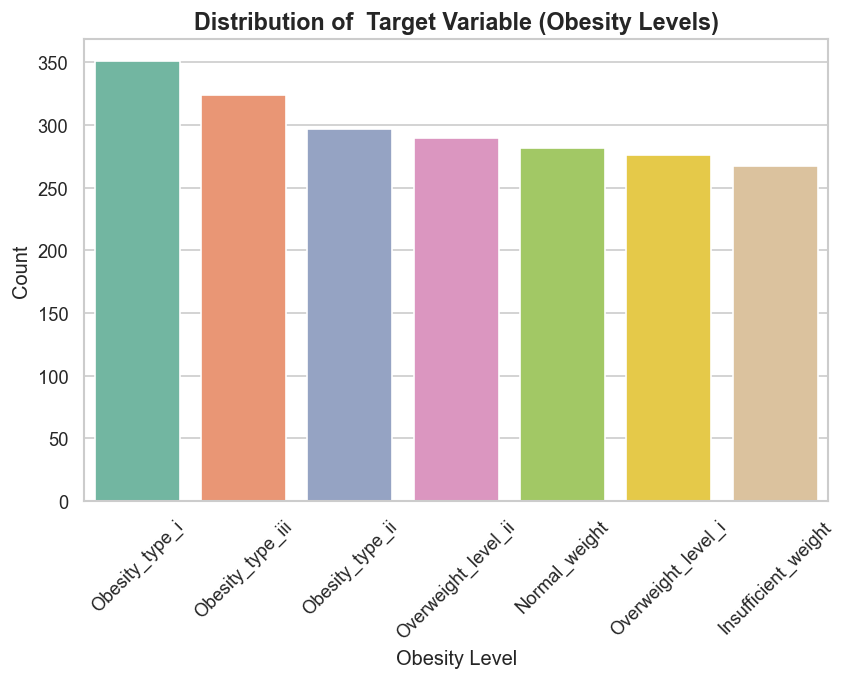

In [51]:
# Plot: Count plot for target variable NObeyesdad
plt.figure(figsize=(8,5))  # Set figure size
sns.countplot(
    x='NObeyesdad',                # Target variable
    data=data_clean,               # Use cleaned dataset
    order=data_clean['NObeyesdad'].value_counts().index,  # Order by frequency
    palette='Set2'                 # Accessible color palette
)
plt.title("Distribution of  Target Variable (Obesity Levels)", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.xlabel("Obesity Level")

# Save figure to visuals folder
plt.savefig("../visuals/graph1_nobeyesdad_distribution.png", bbox_inches='tight')
plt.show()



###  Interpretation Of Distribution of  Target Variable (Obesity Levels) Graph :

This chart, which shows the total count of individuals across all seven weight classifications (`NObeyesdad`), provides an essential baseline for interpreting all public health insights derived from this dataset.


#### 1. High Prevalence of Risk Categories

The most prominent pattern in the distribution is the heavy concentration of individuals in the higher-risk obesity categories.

- Dominant Categories: 
  The highest counts appear in Obesity Type I, Obesity Type II, and Obesity Type III.  
  This indicates that the cohort is not normally distributed, but rather skewed toward higher BMI classifications.

- Magnitude of Severe Obesity:
  The combined height of the bars for Obesity Type I, II, and III demonstrates that severe obesity accounts for a substantial portion of the total sample, highlighting its significance within this population.


#### 2. Implications for Public Health Strategy

The distribution highlights where public health interventions should be prioritized:

- Primary Target:  
 The categories with the highest counts; Obesity Type I and Obesity Type III, represent the largest public health burden**, suggesting the need for **focused management and treatment programs targeting these groups.

- Prevention Focus: 
  Individuals in Overweight Level II are just below the obesity threshold, making them a key population for early prevention efforts aimed at reducing progression into obesity categories.

- Baseline Context:
  This visualization establishes the context for subsequent analyses.


**Conclusion:** The overall distribution graph defines the scale and nature of the obesity problem in this cohort, confirming that the dataset is highly relevant for studying effective obesity prevention and management strategies.

### 4.2 Numeric Features Distribution
*Graph 2: Distribution of Numeric Features*

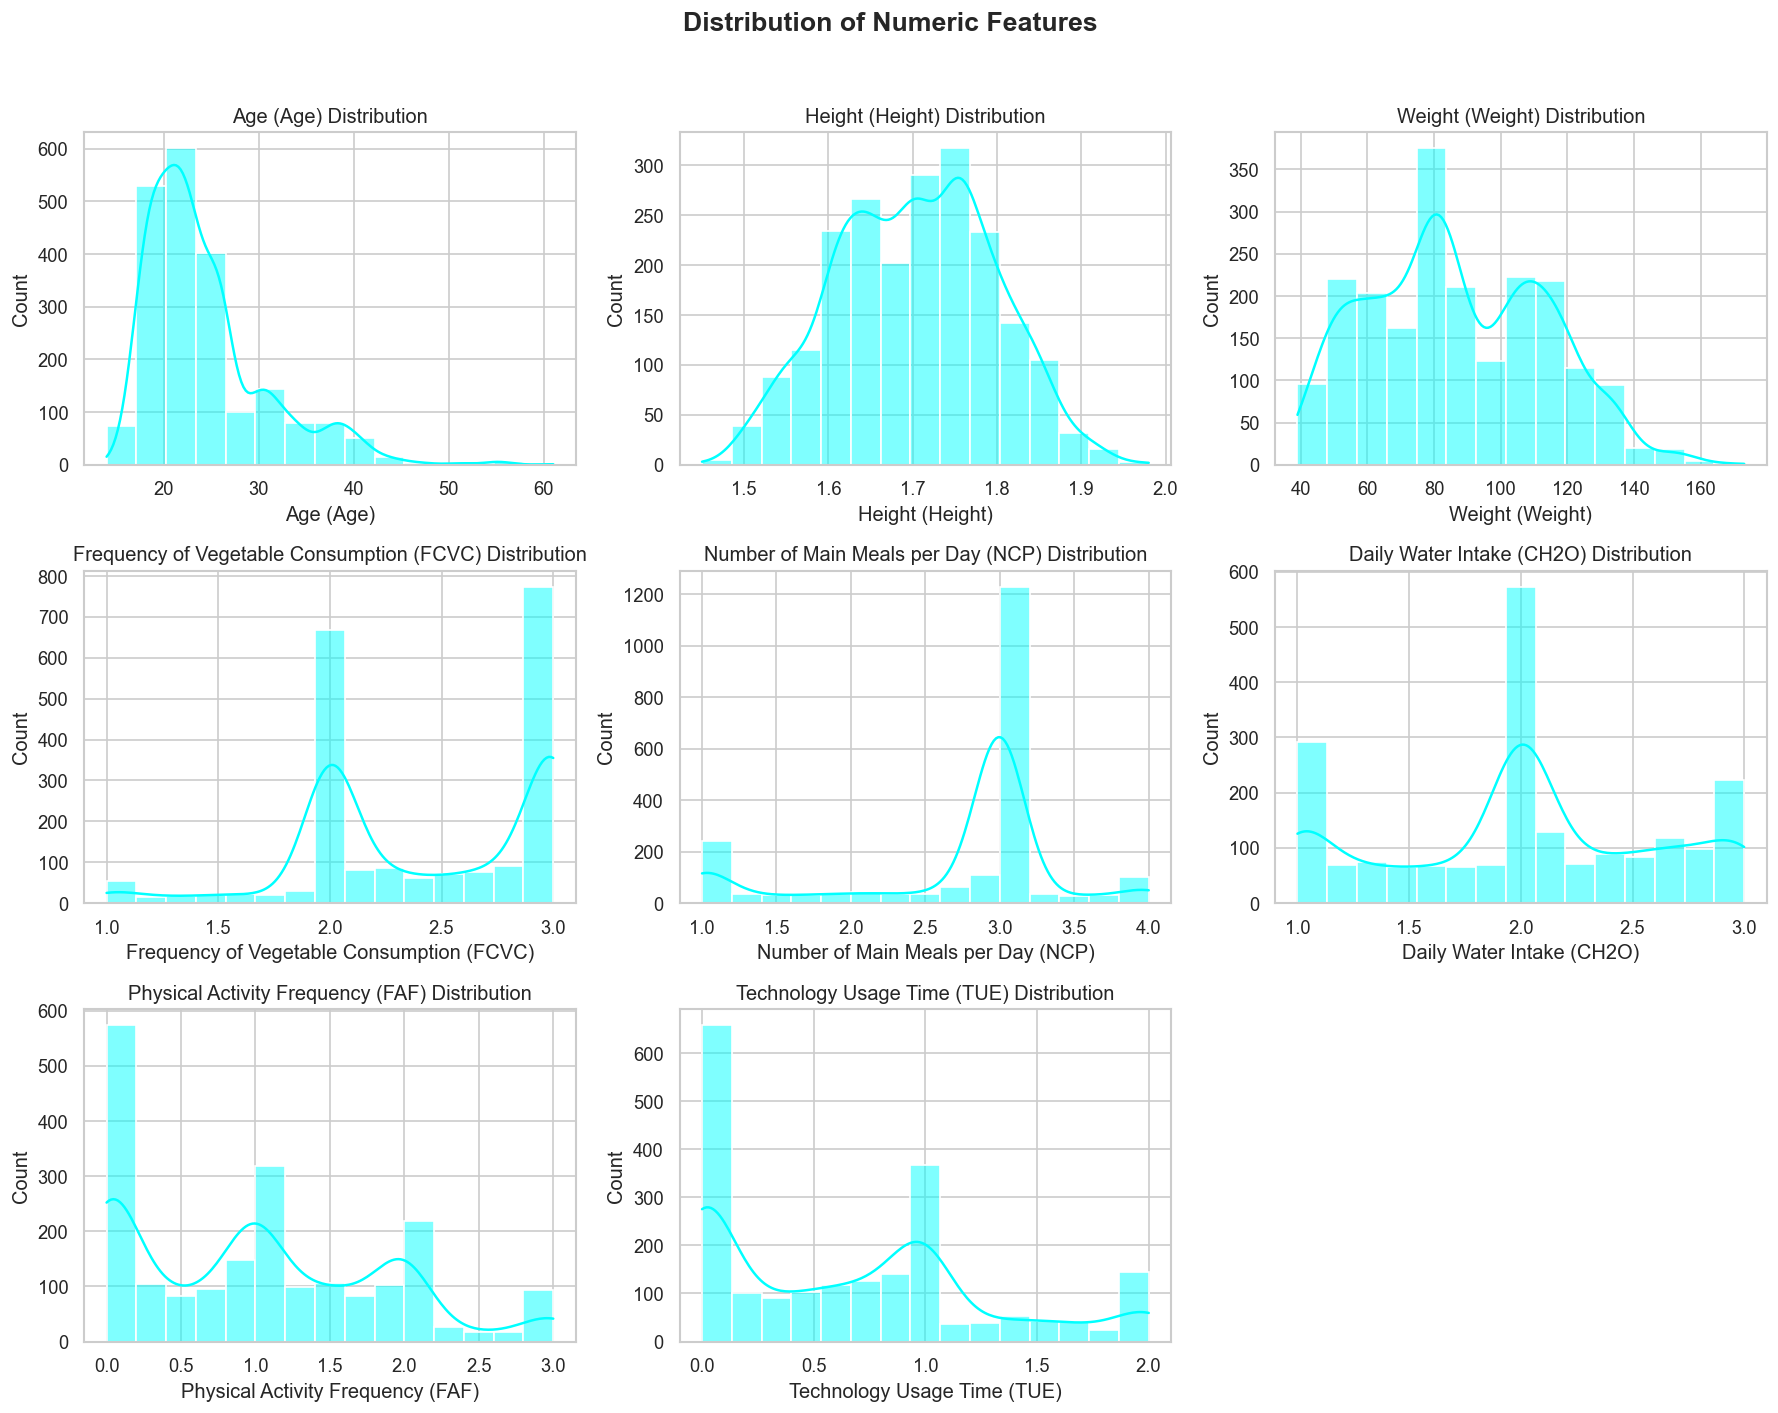

In [52]:
# List of numeric features
numeric_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# --- Dictionary for Descriptive Numeric Titles ---
# Maps acronyms/short names to clear descriptive names.
numeric_feature_name_map = {
    'FCVC': 'Frequency of Vegetable Consumption',
    'NCP': 'Number of Main Meals per Day',
    'CH2O': 'Daily Water Intake',
    'FAF': 'Physical Activity Frequency',
    'TUE': 'Technology Usage Time'
}

# Create a grid of subplots (3 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Loop through each numeric feature to plot histogram
for i, feature in enumerate(numeric_features):
    descriptive_name = numeric_feature_name_map.get(feature, feature)
    
    sns.histplot(
        data_clean[feature],  # Data for the feature
        bins=15,              # Number of histogram bins
        kde=True,             # Overlay kernel density estimate
        ax=axes[i],           # Plot on corresponding subplot
        color='Cyan'          # Histogram color
    )
    
    # Title includes descriptive name + code in parentheses
    axes[i].set_title(f'{descriptive_name} ({feature}) Distribution', fontsize=12)
    axes[i].set_xlabel(f'{descriptive_name} ({feature})')
    axes[i].set_ylabel('Count')

# Remove any empty subplots if features < total axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Main title for the figure
plt.suptitle('Distribution of Numeric Features', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save figure
plt.savefig("../visuals/graph2_numeric_features_distribution.png", bbox_inches='tight')

# Show the plot
plt.show()


### Interpretation of Distribution of Numeric Features Graph:

- Age  
  - Distribution is right-skewed, with most participants being young adults (late teens and early twenties).  
  - Findings and public health insights are most relevant to this age cohort.

- Height  
  - Distribution is bimodal, suggesting two distinct groups with different average heights.  
  - Likely reflects male participants (taller peak) and female participants (shorter peak).

- Weight  
  - Distribution is multi-modal, showing several peaks that align with natural weight clusters (Normal, Overweight, Obese).  
  - Validates the categorical `NObeyesdad` classifications.


* Lifestyle and Habit Features:

- Frequency of Vegetable Consumption (FCVC)  
  - Left-skewed, with most participants reporting high vegetable intake (2–3).  
  - Obesity in this population is likely influenced more by other lifestyle factors such as high-calorie food or low physical activity.

- Number of Main Meals per Day (NCP)  
  - Most participants consume exactly three main meals per day.  
  - Minimal variability suggests it is a weak predictor of obesity.

- Daily Water Intake (CH2O)  
  - Multi-modal, with peaks at 1.0 (<1L) and 2.0 (1–2L).  
  - Segmentation indicates good discriminatory power, making it a promising predictor for obesity risk.

- Physical Activity Frequency (FAF)  
  - Strongly multi-modal, with a large peak at 0.0 (no activity).  
  - Lack of physical activity is a critical lifestyle risk factor and strong predictor in the model.

- Technology Usage Time (TUE)  
  - Multi-modal, with peaks at 0.0 (minimal use) and 1.0 hour.  
  - Highlights low- and moderate-sedentary groups, making it a useful predictor for sedentary-related obesity risk.


### Summary of Top Numeric Predictors

- Weight: Multi-modal distribution aligns with obesity categories, making it a core predictor of `NObeyesdad`.  
- Physical Activity Frequency (FAF): Peak at 0.0 highlights inactivity as a major differentiator across obesity levels.  
- Daily Water Intake (CH2O): Clear separation between low and moderate intake groups indicates good predictive power for obesity risk.


### 4.3 Numeric Features vs. Target Variable (Box Plots and ANOVA)

The Box Plots provide visual evidence that Weight is the primary driver, while factors like Age and TUE show minimal change in their median values across the seven obesity categories. This visual finding is quantitatively validated by the ANOVA bar chart, which confirms that Weight has the strongest statistical signal, justifying its use as the core metric.


*Graph 3: Distribution of Numeric Features Across Obesity Levels*

C:\Users\User\AppData\Local\Temp\ipykernel_15368\4103411891.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\User\AppData\Local\Temp\ipykernel_15368\4103411891.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\User\AppData\Local\Temp\ipykernel_15368\4103411891.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\User\AppData\Local\Temp\ipykernel_15368\4103411891.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

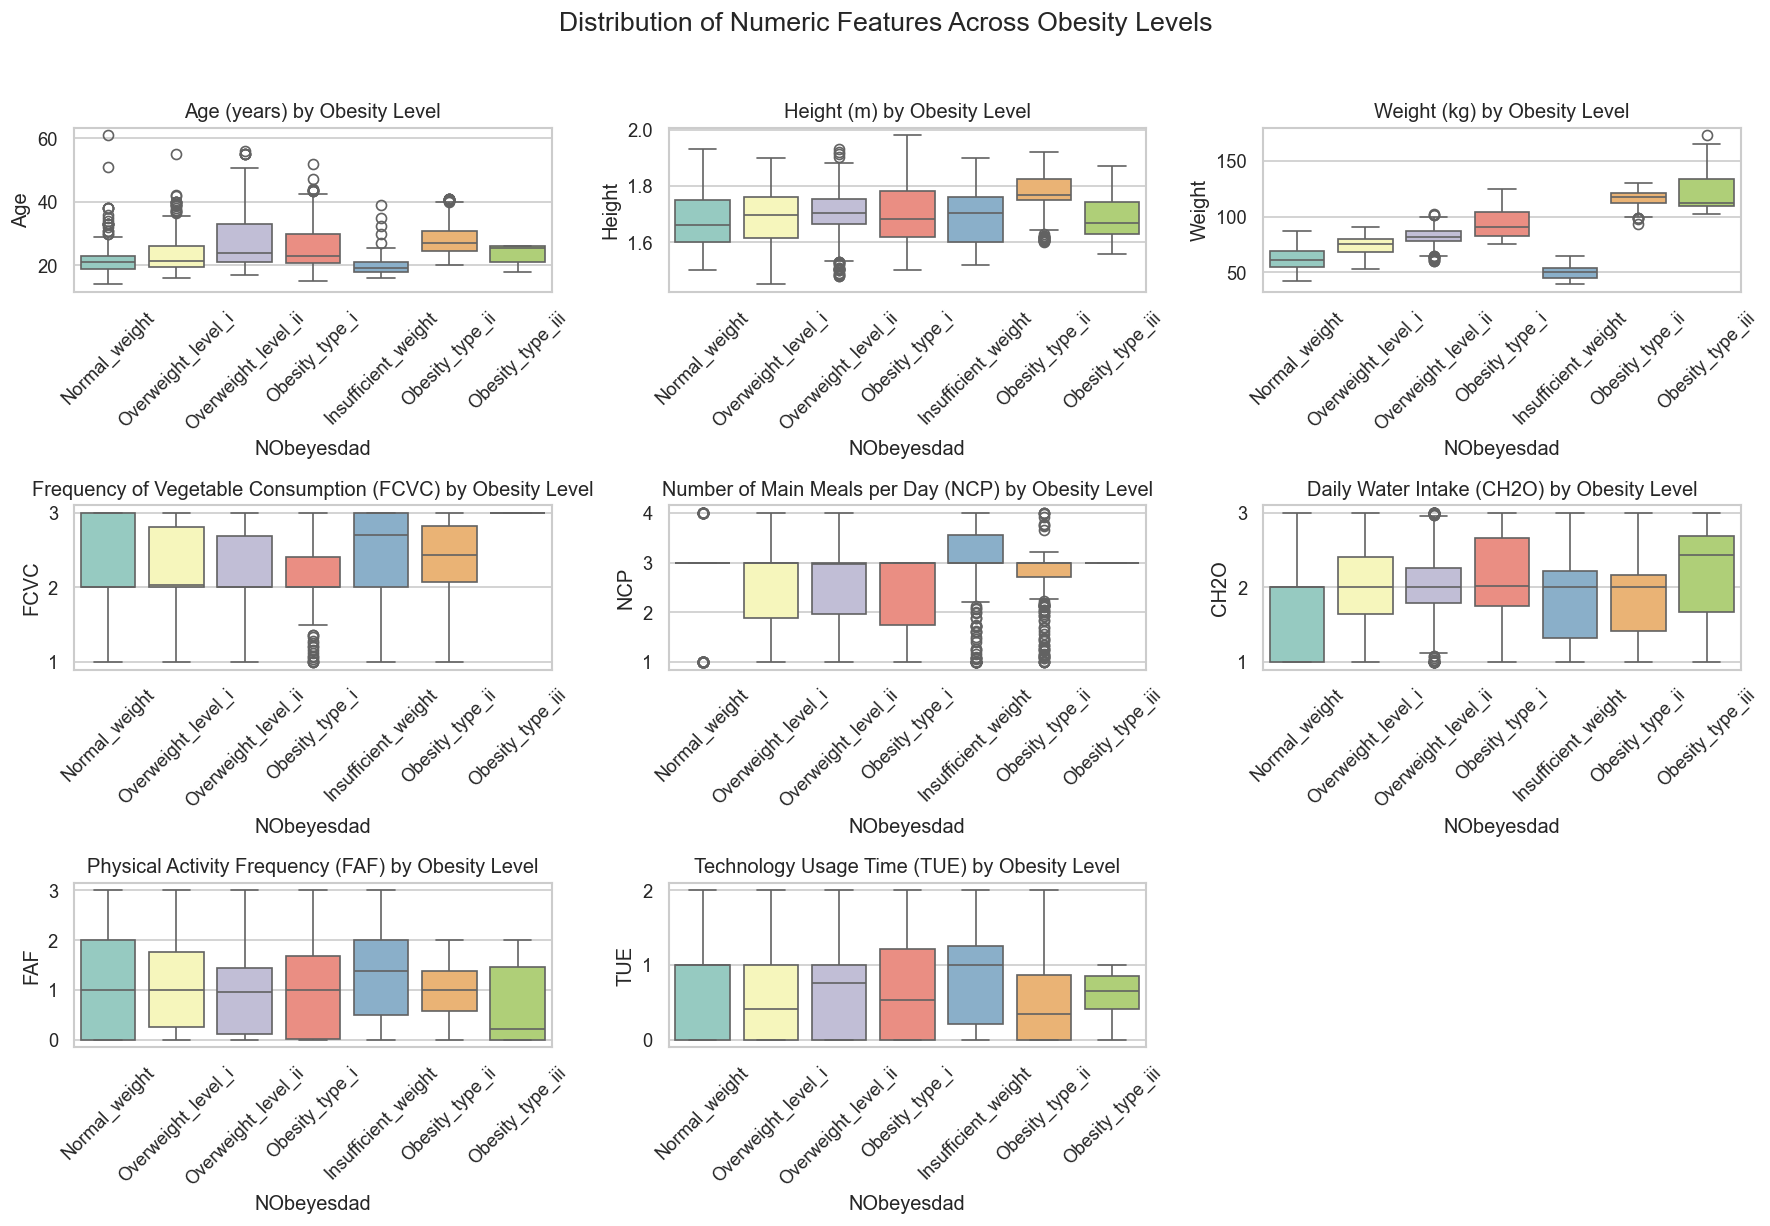

In [53]:
# Dictionary mapping numeric features to descriptive names
feature_names = {
    'Weight': 'Weight (kg)',
    'Height': 'Height (m)',
    'Age': 'Age (years)',
    'FCVC': 'Frequency of Vegetable Consumption (FCVC)',
    'NCP': 'Number of Main Meals per Day (NCP)',
    'CH2O': 'Daily Water Intake (CH2O)',
    'FAF': 'Physical Activity Frequency (FAF)',
    'TUE': 'Technology Usage Time (TUE)'
}

# Create boxplots of numeric features grouped by obesity level
plt.figure(figsize=(15,10))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3,3,i)   # Arrange subplots in a 3x3 grid
    sns.boxplot(
        x='NObeyesdad',  # Categorical target
        y=feature,        # Numeric feature
        data=data_clean,  
        palette='Set3'    # Accessible colors
    )
    # Subplot title with descriptive name
    plt.title(f"{feature_names.get(feature, feature)} by Obesity Level")
    plt.xticks(rotation=45)

# Main title for the entire figure
plt.suptitle("Distribution of Numeric Features Across Obesity Levels", fontsize=16, y=1.02)

plt.tight_layout()
plt.savefig("../visuals/graph3_boxplots_numeric_by_obesity.png", bbox_inches='tight')  # Save figure
plt.show()


### Interpretation of Distribution of Numeric Features Across Obesity Levels Graph:

The visualization highlights the numeric demographic and lifestyle features most relevant for understanding obesity patterns, informing public health priorities.

- Age
  - Slight upward trend in median age as obesity level increases.  
  - Older participants are more likely to be in higher obesity categories, while younger participants cluster in Insufficient or Normal Weight categories.  
  - Age is a relevant demographic factor; obesity risk increases modestly even within this young adult sample.

- Height
  - Median height is tightly clustered (~1.68–1.75 m) across obesity levels.  
  - Minimal direct impact on obesity category; height is essential for BMI calculation but weak as a standalone predictor.  
  - Height alone does not differentiate obesity levels; it must be combined with weight to calculate BMI.

- Weight
  - Shows a near-perfect incremental relationship across obesity levels.  
  - Higher weights correspond directly to higher obesity classifications, while lower weights align with Normal or Insufficient Weight categories.  
  - Weight is the most important numeric predictor and is critical for BMI calculation.

- Frequency of Vegetable Consumption (FCVC)
  - Medians are high (≥2.5) with minor variation.  
  - Low FCVC (≤1.5) may indicate higher obesity risk, but most participants maintain high vegetable intake.  
  - FCVC alone is a weak predictor; obesity risk is more influenced by other lifestyle habits.

- Number of Main Meals per Day (NCP)
  - Median number of meals is consistently 3 across categories, with a slight elevation (~3.5) in the Insufficient Weight group.  
  - Minimal variability makes NCP a weak predictor; focus should be on food content and other habits instead.

- Daily Water Intake (CH2O)
  - Median intake ~2.0 for most categories; highest in Obesity Type III (~2.4).  
  - Low intake may align with Overweight categories, while moderate to high intake is prevalent.  
  - Water intake has a complex, non-linear relationship; informative for sub-groups but not a primary driver.

- Physical Activity Frequency (FAF)
  - Clear inverse relationship with obesity levels.  
  - Low FAF aligns with Overweight and Obese categories; high FAF aligns with Normal Weight.  
  - Strong predictor; low physical activity is a major lifestyle factor associated with higher obesity risk.

- Technology Usage Time (TUE)
  - Non-linear pattern: higher median usage in Normal/Insufficient Weight groups, lower in Obesity groups.  
  - Helps distinguish low- and moderate-sedentary participants.  
  - Useful secondary predictor but not a primary driver of obesity.


### Summary

Top 3 numeric predictors based on the distributions:  
- Weight: Strongest and most consistent upward trend across obesity categories; the most defining numeric predictor.  
- Physical Activity Frequency (FAF): Clear inverse trend; higher activity aligns with lower obesity levels, low activity with higher levels.  
- Age: Modest but consistent increase with obesity categories, indicating age contributes to risk even within this young adult population.

### 4.3.1 Quantitative Validation: Numeric Feature Strength (ANOVA)
*Graph 4: Numeric Feature Strength (ANOVA)*


While the boxplots visually illustrate how numeric features vary across obesity levels, they do not quantify the statistical significance of these differences. To confirm and complement these observations, we use ANOVA to compare numeric feature means across obesity categories. The resulting p-values indicate which features show meaningful differences, reinforcing the patterns seen in the boxplots.

In [37]:
numeric_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

anova_results = {}

# Run ANOVA for each feature
for feature in numeric_features:
    groups = [group[feature].values for name, group in data_clean.groupby('NObeyesdad')]
    stat, p = f_oneway(*groups)
    anova_results[feature] = p

# Create DataFrame
anova_df = pd.DataFrame.from_dict(anova_results, orient='index', columns=['p_value'])

# Mark significance
anova_df['Significant'] = anova_df['p_value'] < 0.05

# Add rank (1 = most significant)
anova_df['Rank'] = anova_df['p_value'].rank(method='dense', ascending=True)

# Sort by rank / p-value
anova_df = anova_df.sort_values(by='Rank')

anova_df


,p_value,Significant,Rank
Weight,0.000000e+00,True,1.0
FCVC,3.796507e-121,True,2.0
Age,3.246862e-86,True,3.0
Height,2.518501e-43,True,4.0
NCP,7.132002e-31,True,5.0
FAF,1.155420e-20,True,6.0
CH2O,4.297247e-17,True,7.0
TUE,1.772380e-08,True,8.0


#### Interpretion Of ANOVA Results:

- Small p-values (< 0.05) indicate a feature’s mean differs significantly across obesity levels, highlighting important predictors.  
- Large p-values (> 0.05) suggest little variation across categories, making the feature less informative alone.  

* Key Insights from Numeric Features:
  - Weight is the strongest predictor, clearly differentiating obesity categories.  
   - Age, FAF, and CH2O show meaningful trends, providing additional continuous signals.  
   - Height, FCVC, NCP, and TUE have statistically significant differences, but effects are subtle; useful primarily in combination with stronger  predictors.  

*The ANOVA chart (1 – p-value) complements the boxplots by visually ranking features according to their relevance in distinguishing obesity levels, making the hierarchy of predictive signals easy to interpret at a glance.*

C:\Users\User\AppData\Local\Temp\ipykernel_15368\3379272551.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Strength', y=anova_df.index, data=anova_df, palette='viridis')


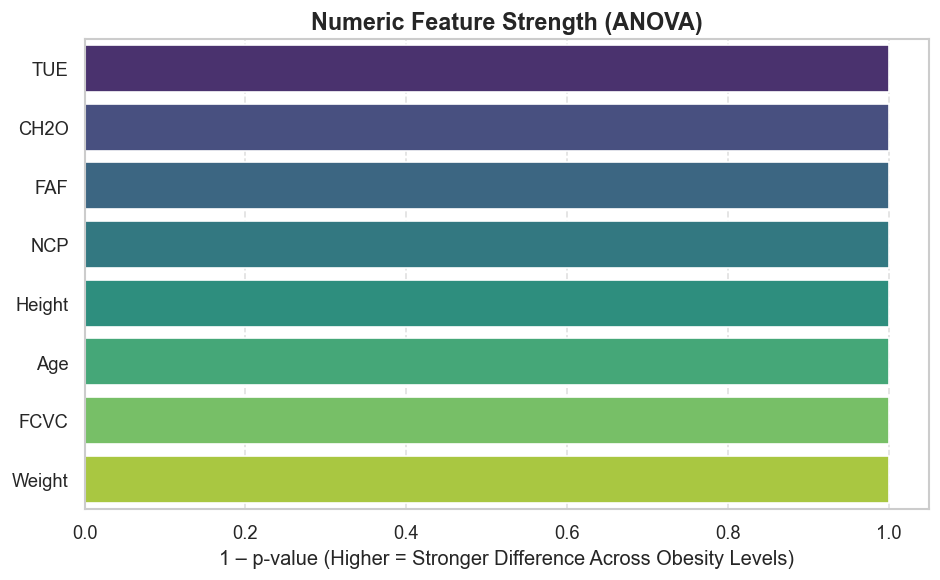

In [54]:
anova_results = {}
for feature in numeric_features:
    groups = [group[feature].values for _, group in data_clean.groupby('NObeyesdad')]
    stat, p = f_oneway(*groups)
    anova_results[feature] = p

anova_df = (pd.DataFrame.from_dict(anova_results, orient='index', columns=['p_value'])
            .sort_values('p_value', ascending=False))
anova_df['Strength'] = 1 - anova_df['p_value']   # so higher bar = stronger difference

# --- Plot ---
plt.figure(figsize=(8,5))
sns.barplot(x='Strength', y=anova_df.index, data=anova_df, palette='viridis')
plt.title('Numeric Feature Strength (ANOVA)', fontsize=14, fontweight='bold')
plt.xlabel('1 – p-value (Higher = Stronger Difference Across Obesity Levels)')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# --- Save the ANOVA Strength barplot ---
plt.tight_layout()
plt.savefig("../visuals/graph4_anova_numeric_strength.png", bbox_inches='tight')
plt.show()

#### Interpretion Of Numeric Feature Strength Graph: 
- All numeric features significantly differentiate obesity levels (p < 0.05), supporting boxplot patterns.  
- Strongest predictor: Weight.  
- Moderate signals: FCVC, Age, FAF, CH2O.  
- Weaker but significant: Height, NCP, TUE.  
- Bar plot (1 – p-value) shows all features near 1.0; hierarchy follows p-values: Weight > FCVC > Age > … > TUE.  

*Takeaway:
 - Weight dominates, but all numeric features provide complementary information for distinguishing obesity levels.



### Overall Summary of Numeric Feature Analysis

This analysis uses box plots, ANOVA p-values, and the Numeric Feature Strength (1 – p-value) plot to evaluate numeric demographic and lifestyle features in predicting obesity levels.

- Box Plots: Weight (and BMI) shows a near-perfect incremental pattern across obesity categories. Age, FAF, and CH2O show meaningful trends, while Height, FCVC, NCP, and TUE differences are subtler.  
- ANOVA p-values: All numeric features are statistically significant (p < 0.05). Weight has the smallest p-value, followed by FCVC, Age, FAF, and CH2O. Height, NCP, and TUE are weaker but still significant.  
- Numeric Feature Strength Plot: Visual ranking aligns with ANOVA results: Weight > FCVC > Age > FAF > CH2O > Height > NCP > TUE. All features contribute to differentiating obesity levels.  

* Key Takeaway:
   - Weight is the strongest numeric predictor. Age, FAF, CH2O, and FCVC provide moderate signals, while Height, NCP, and TUE are weaker but significant. Together, these analyses offer complementary insights for modeling and public health interventions.

### 4.4 Categorical Features vs. Target Variable (Count Plots and Cramér's V)
The categorical grid provides crucial initial insights: **FAVC** and **SCC** display stark, almost binary separation between low-risk and high-risk groups. **Gender** shows a critical differentiation in severe obesity types. The **Cramér's V plot** confirms these visual observations, ranking Family History and Gender as the strongest associated factors, reinforcing our focus on these key demographics and behavioral habits.

*Graph 5: Categorical Features by Obesity Level*

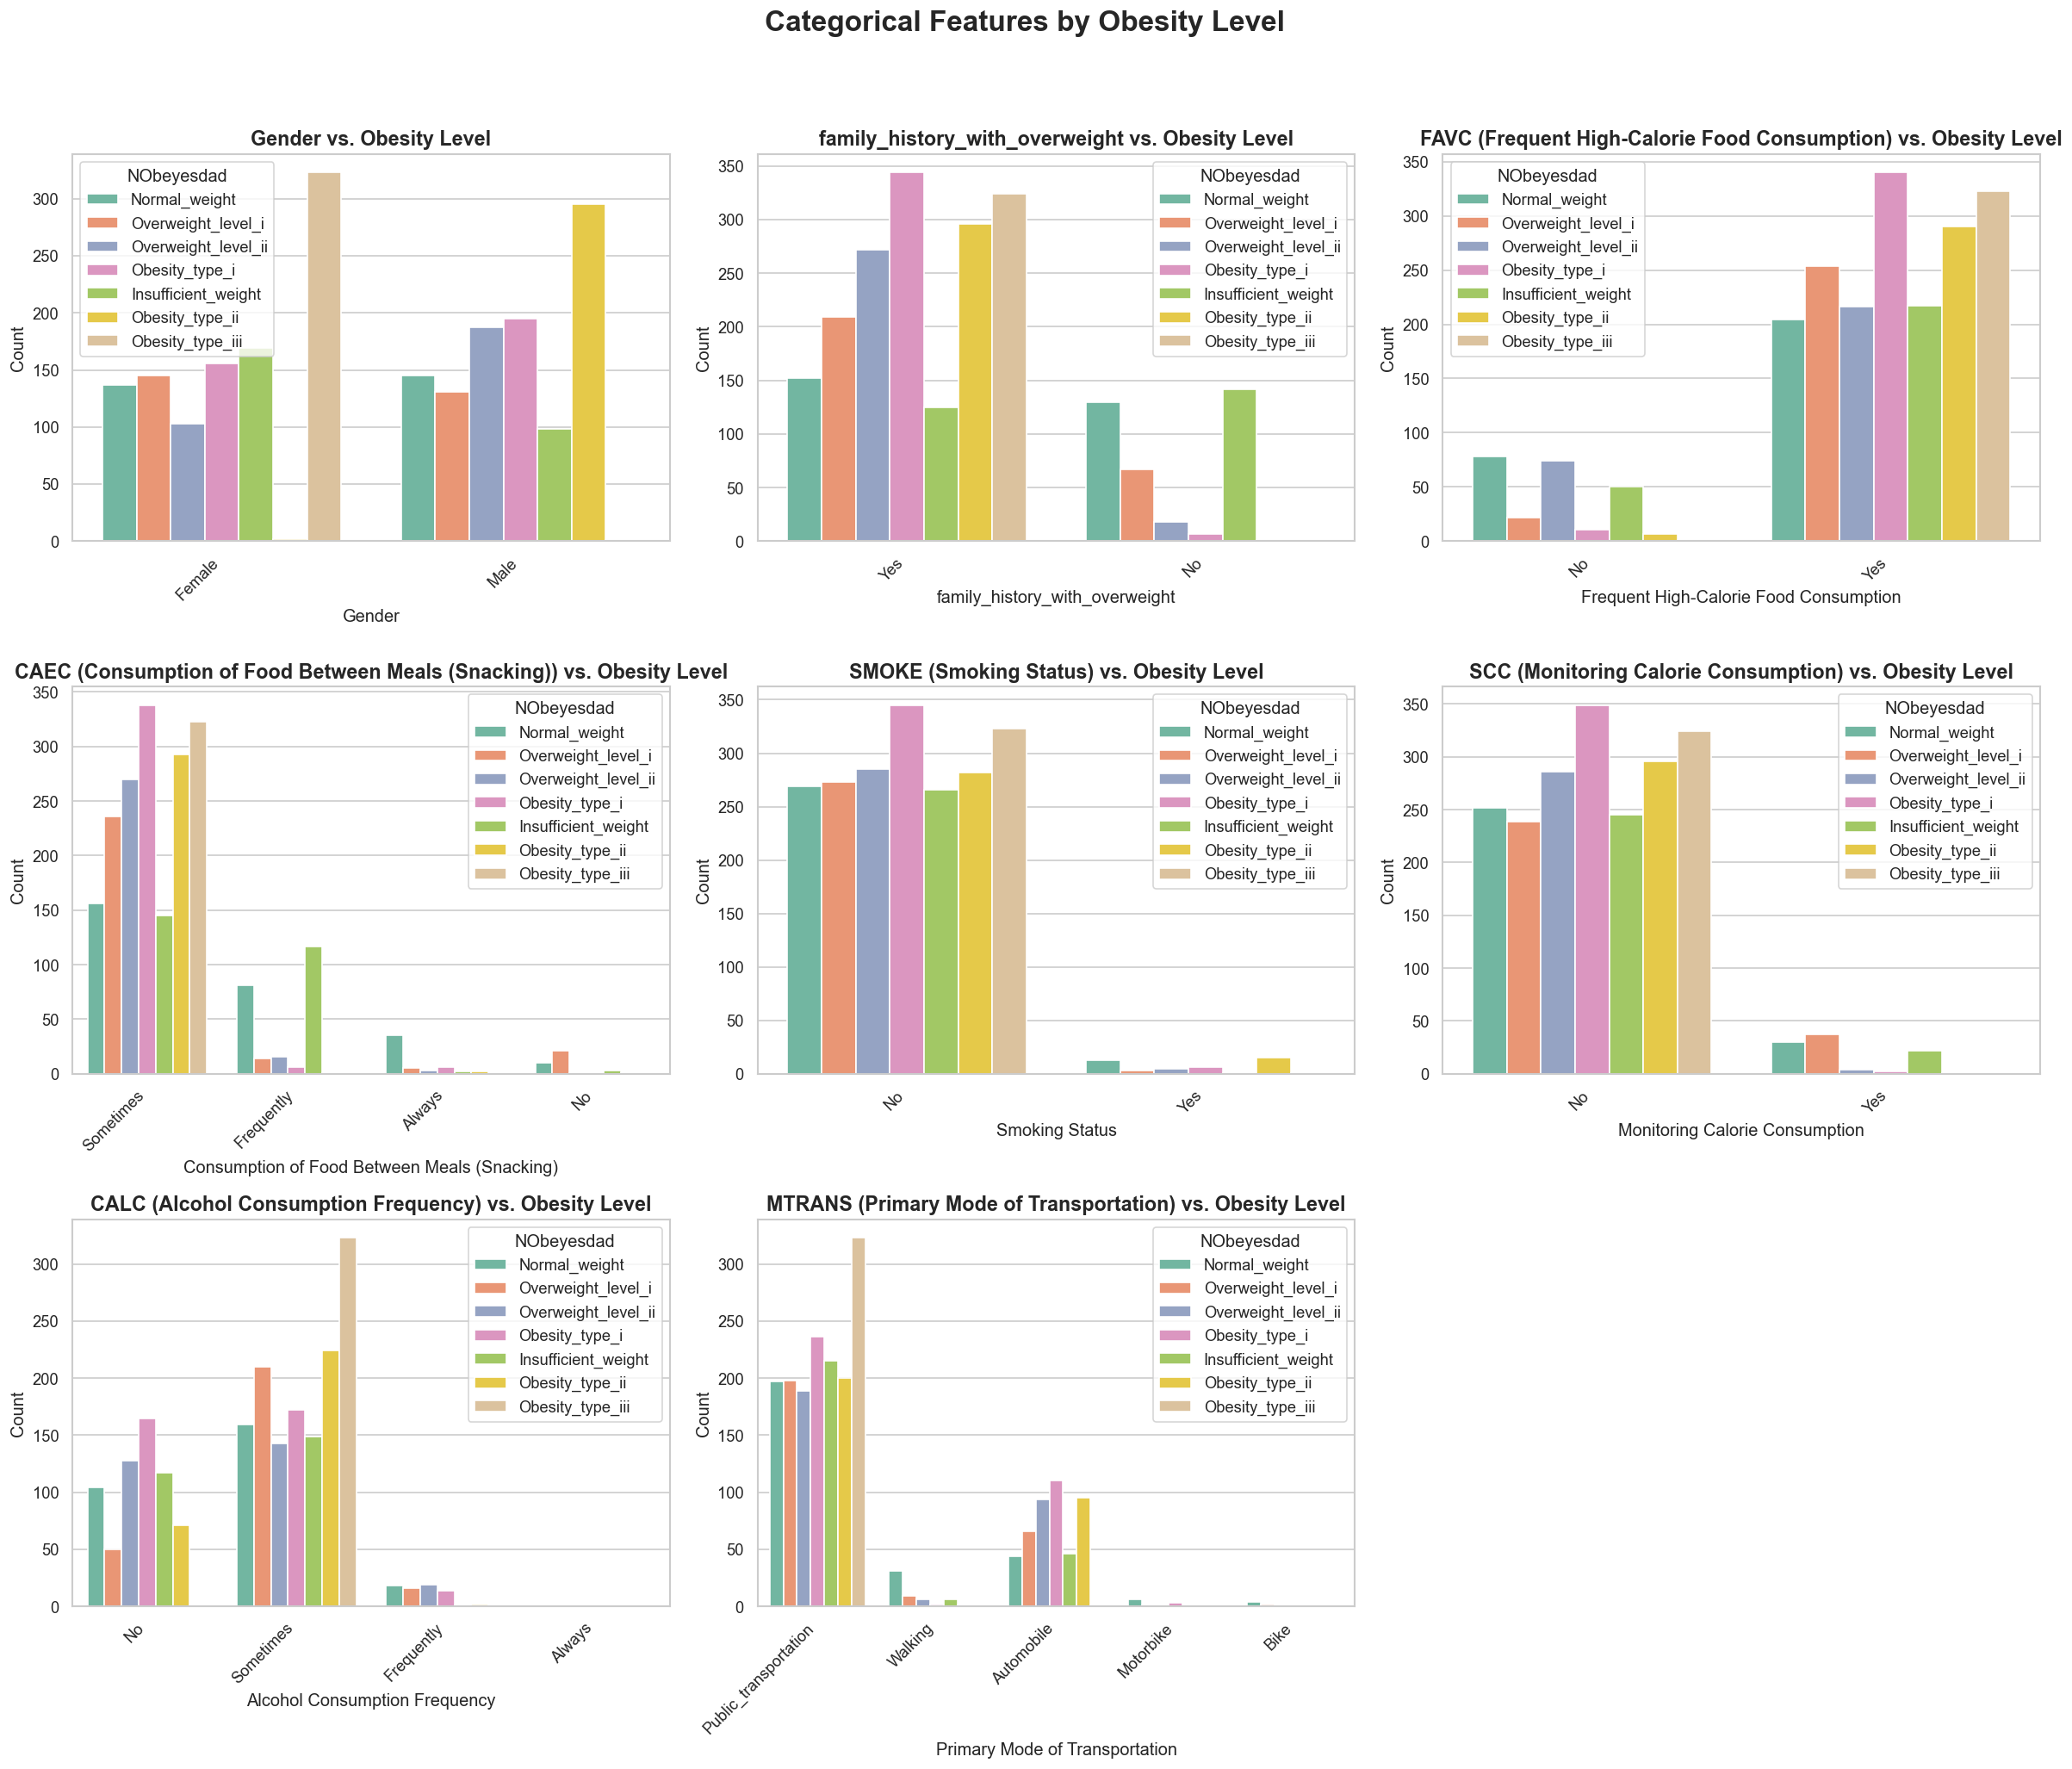

In [57]:
# --- Dictionary for Descriptive Titles ---
# Maps coded features to full, human-readable names
feature_name_map = {
    'FAVC': 'Frequent High-Calorie Food Consumption',
    'CAEC': 'Consumption of Food Between Meals (Snacking)',
    'SMOKE': 'Smoking Status',
    'SCC': 'Monitoring Calorie Consumption',
    'CALC': 'Alcohol Consumption Frequency',
    'MTRANS': 'Primary Mode of Transportation'
}

# List of categorical features to visualize
categorical_features = [
    'Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 
    'SMOKE', 'SCC', 'CALC', 'MTRANS'
]

# --- Create subplot grid ---
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 18))
axes = axes.flatten()  # Flatten for easy iteration

# --- Plot each categorical feature ---
for i, feature in enumerate(categorical_features):
    # Get descriptive name (fallback to feature itself if not mapped)
    descriptive_name = feature_name_map.get(feature, feature)
    
    # Countplot with obesity level as hue
    sns.countplot(
        x=feature,
        hue='NObeyesdad',
        data=data_clean,
        ax=axes[i]
    )
    
    # Construct detailed title
    title_label = f'{feature} ({descriptive_name})' if feature in feature_name_map else descriptive_name
    axes[i].set_title(f'{title_label} vs. Obesity Level', fontsize=14, fontweight='bold')
    
    # Clean labels
    axes[i].set_xlabel(descriptive_name)
    axes[i].set_ylabel('Count')
    
    # Rotate x-axis labels for readability
    plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')

# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Main title for figure
plt.suptitle('Categorical Features by Obesity Level', fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# --- Save figure ---
plt.savefig("../visuals/graph5_categorical_features_distribution.png", bbox_inches='tight')

# Show plot
plt.show()


#### Interpretation of Categorical Features by Obesity Level Graph: 

- Gender
  - Insight: Strong, distinct relationship with the most severe obesity levels.  
  - Female Dominance: Obesity Type III (~320) is predominantly female.  
  - Male Dominance: Obesity Type II (~300) is predominantly male.  
  - General Trend: Other weight categories (Normal, Insufficient, Overweight I & II, Obesity Type I) are relatively balanced.  
  - Key Takeaway: Gender differences suggest biological, behavioral, or environmental factors may influence severe obesity differently for males and females.

- Family History of Overweight
  - Insight: Strong correlation with higher BMI classifications.  
  - Risk Indicator: Individuals with a family history are more likely to be in Overweight Level II and all Obesity Types.  
  - Protective Factor: Absence of family history is associated with Normal or Insufficient Weight.  
  - Key Takeaway: Highlights the influence of genetic or shared environmental factors on body weight.

- FAVC (Frequent High-Calorie Food Consumption)
  - Insight: Powerful predictor of higher obesity levels.  
  - Risk Factor: "Yes" group dominates Obesity Types I, II, III and Overweight Levels I & II.  
  - Protective Factor: "No" group is concentrated in Normal and Insufficient Weight.  
  - Key Takeaway: Frequent consumption of high-calorie foods is strongly associated with overweight and obesity.

- CAEC (Snacking Frequency)
  - Insight: Non-linear relationship with obesity.  
  - High-Risk Group: "Sometimes" group contains nearly all severe obesity cases (Obesity Types I, II, III).  
  - Low-Risk Groups: "Frequently," "Always," and "No" groups are concentrated in lower weight categories.  
  - Key Takeaway: Occasional snacking is linked to higher obesity, while frequent snacking may involve low-calorie foods or high activity levels.

- SMOKE (Smoking Status)
  - Insight: Weak relationship; skewed demographic.  
  - Non-Smokers: Dominate the dataset, containing nearly all obesity cases.  
  - Smokers: Very low counts; negligible obesity presence.  
  - Key Takeaway: Sample is highly skewed; smoking status is not a meaningful predictor in this dataset.

- SCC (Monitoring Calorie Consumption)
  - Insight: Strong inverse relationship with obesity.  
  - Risk Factor: "No" group contains nearly all obesity cases.  
  - Protective Factor: "Yes" group is largely free of obesity, dominated by Normal Weight or Overweight Level I.  
  - Key Takeaway: Calorie monitoring is a powerful protective behavioral factor against obesity.

- CALC (Alcohol Consumption Frequency)
  - Insight: Non-linear relationship with obesity.  
  - High-Risk Group: "Sometimes" alcohol consumption contains the highest counts of severe obesity (Types II & III).  
  - Low-Risk Groups: "No," "Frequently," and "Always" have lower obesity prevalence.  
  - Key Takeaway: Moderate alcohol intake is associated with higher obesity counts; frequency alone is not the primary driver—other lifestyle factors may be confounding.

- MTRANS (Transportation Mode)
  - Insight: Sedentary transport associated with higher obesity.  
  - High-Risk Groups: Public Transportation and Automobile users have the highest counts of severe obesity.  
  - Low-Risk Groups: Walking, Bike, and Motorbike users are too few to draw conclusions.  
  - Key Takeaway: Reliance on non-active transportation is linked to higher obesity prevalence.

*After visualizing the distributions of all categorical features across obesity levels, certain patterns are evident: features like Gender, Family History, and lifestyle behaviors such as snacking or high-calorie food consumption show clear variation across obesity categories.*

### 4.4.1 Quantitative Validation: Categorical Feature Strength (Cramér’s V)

To complement these visuals, we calculate Cramér’s V, a descriptive statistic that quantifies the strength of association between each categorical feature and the target variable NObeyesdad. This helps us rank features by the strength of their observed patterns and support our visual interpretations.

*Graph 6: Categorical Feature Strength (Cramér’s V) vs. Obesity Level*

In [40]:
# Function for Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1))/(n - 1))    
    rcorr = r - ((r - 1)**2)/(n - 1)
    kcorr = k - ((k - 1)**2)/(n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# List of categorical variables
categorical_features = [
    'Gender', 
    'family_history_with_overweight',
    'SMOKE', 
    'FAVC',
    'SCC', 
    'CAEC', 
    'CALC', 
    'MTRANS'
]

# Calculate Cramér’s V for each
results = {col: cramers_v(data_clean[col], data_clean['NObeyesdad']) for col in categorical_features}

# Create and rank summary table
cramers_results = pd.DataFrame.from_dict(results, orient='index', columns=['Cramers_V'])
cramers_results = cramers_results.sort_values(by='Cramers_V', ascending=False)

# Display ranked table
print(cramers_results)


                                Cramers_V
Gender                           0.558835
family_history_with_overweight   0.541521
CAEC                             0.335882
FAVC                             0.328623
SCC                              0.241865
CALC                             0.225373
MTRANS                           0.178191
SMOKE                            0.111324


#### Interpretation of Cramér’s V Results:

- Values near 0 indicate little or no association with obesity levels.  
- Values ≥ 0.3 indicate moderate to strong association.  
- Values ≥ 0.5 indicate very strong association.  

* Key Insights from Categorical Features:
  - Demographics & history (Gender, family_history_with_overweight) are the most strongly associated factors.  
  - Specific eating habits (CAEC, FAVC) are important behavioral contributors.  
  - General habits (MTRANS, SMOKE) show weak associations, suggesting interventions targeting these alone would be less effective than those addressing top-ranked features.  

*The Cramér’s V results quantify the strength of association between categorical features and obesity levels, highlighting which factors are most relevant for risk assessment and modeling.*


C:\Users\User\AppData\Local\Temp\ipykernel_15368\1466544942.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


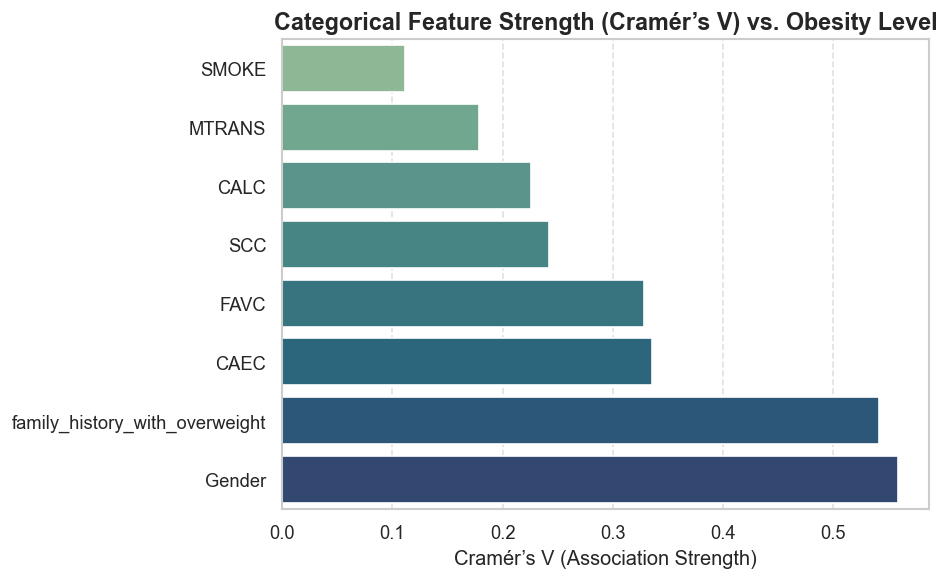

In [58]:
# --- Compute Cramér’s V for each categorical feature ---
results = {}
for col in categorical_features:
    results[col] = cramers_v(data_clean[col], data_clean['NObeyesdad'])

# Create a summary DataFrame and sort ascending for plotting
cramers_df = pd.DataFrame.from_dict(results, orient='index', columns=['Cramers_V'])
cramers_df = cramers_df.sort_values('Cramers_V', ascending=True)

# --- Plot Cramér’s V as barplot ---
plt.figure(figsize=(8,5))
sns.barplot(
    x='Cramers_V',
    y=cramers_df.index,
    data=cramers_df,
    palette='crest'
)
plt.title('Categorical Feature Strength (Cramér’s V) vs. Obesity Level', fontsize=14, fontweight='bold')
plt.xlabel('Cramér’s V (Association Strength)')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adjust layout and save figure
plt.tight_layout()
plt.savefig("../visuals/graph6_categorical_cramers_v.png", bbox_inches='tight')

# Display the plot
plt.show()


#### Interpretation of Categorical Feature Strength (Cramér’s V) vs. Obesity Level

- Bars near 0 indicate little or no relationship; bars ≥ 0.3 indicate a strong association.  
- Features with higher bars (e.g., Gender, Family History) have stronger links to obesity.  
- Features with lower bars (e.g., SMOKE, MTRANS) show weaker associations.  

The Cramér’s V plot complements the countplots, providing a clear, quantitative way to prioritize risk factors for interventions or modeling.



### 4.5 Top Predictors Summary (EDA Synthesis)

This section synthesizes the quantitative findings from ANOVA and Cramér’s V to identify the most potent risk factors for modeling and targeted interventions. The analysis reveals a hierarchy of risk, where fixed demographic factors are stronger than most lifestyle behaviors, highlighting the importance of prioritizing Weight and Gender alongside influential habits.

| Rank | Top Numeric Predictor (ANOVA) | Top Categorical Predictor (Cramér’s V) |
|------|-------------------------------|---------------------------------------|
| 1    | Weight (p ≈ 0.00)             | Gender (V ≈ 0.56)                     |
| 2    | FCVC (p ≈ 1e-121)             | family_history_with_overweight (V ≈ 0.54) |
| 3    | Age (p ≈ 1e-86)               | CAEC (V ≈ 0.34)                        |
| 4    | Height (p ≈ 1e-43)            | FAVC (V ≈ 0.33)                        |

#### Synthesis Narrative: Key Findings

1. **Fixed Factors Set the Primary Risk**  
   Cramér’s V results show that the strongest categorical predictors are fixed factors: Gender (V ≈ 0.56) and Family History with Overweight (V ≈ 0.54). These features are most effective at differentiating obesity levels, confirming that underlying demographic and household factors are dominant risk drivers.

2. **Strategic Implication for Intervention**  
   While fixed factors set the baseline risk, the highest-ranking modifiable habits are prime targets for intervention.  

   - **Priority Modifiable Behaviors:**  
     - CAEC (Consumption of Food Between Meals, V ≈ 0.34)  
     - FAVC (Frequent High-Calorie Food Consumption, V ≈ 0.33)  
     These behaviors offer the greatest leverage for public health campaigns.  

   - **Inefficient Targets:**  
     - SMOKE (V ≈ 0.11)  
     - TUE (very weak ANOVA signal)  
     Focusing primarily on these factors is unlikely to effectively reduce obesity risk in high-risk populations.

*Overall Takeaway:* Fixed demographic factors define baseline risk, while targeted lifestyle behaviors provide actionable points for intervention.


## 5.0 Data Story: Synthesis & Actionable Insights
---


## 5.1 Inter-Feature Correlation & Risk

To begin the multivariate analysis, we examine the linear relationships among the eight numeric features. Understanding these correlations helps identify:

- **Redundancy:** features that provide overlapping information and may not contribute uniquely to prediction models.
- **Synergy:** pairs of independent risk factors that amplify each other’s influence and reveal opportunities for bundled interventions.

This approach ensures that the final insights focus not just on *what matters*, but *what works together* in shaping obesity risk patterns.

*Graph 7: Correlation Heatmap of Numeric Features*


## 5.0 Data Story: Synthesis & Actionable Insights
---
We now transition from gathering evidence to synthesizing a narrative. This section will focus exclusively on the actionable patterns  discovered in Section 4, using only the most effective visualization to tell the story of intervention.

## 5.1  Inter-Feature Correlation & Risk

We begin the multivariate analysis by examining the linear relationships among the eight numeric features. This step is crucial to identify potential redundancy (features that are too highly correlated to be useful separately) and to uncover synergistic relationships between independent risk factors, which informs the most efficient intervention strategies.

*Graph 7: Correlation Heatmap of Numeric Features*

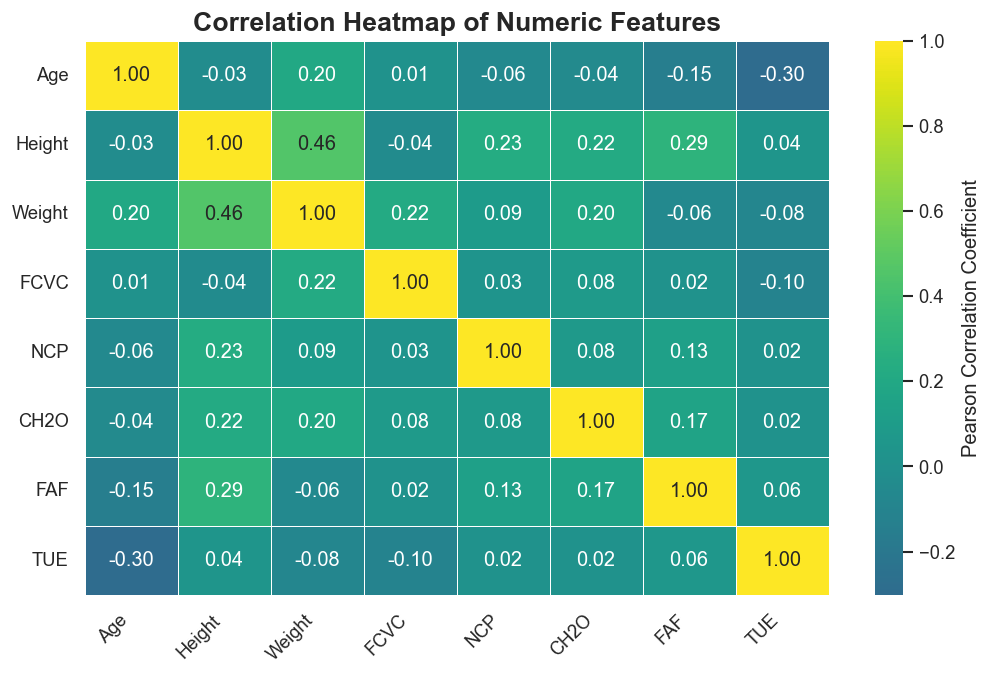

In [61]:
plt.figure(figsize=(10,6)) # Adjusted height to 6
sns.heatmap(
    data_clean[numeric_features].corr(),
    annot=True, # Display correlation values on the map
    cmap='viridis', # Changed to viridis as requested
    center=0, # Center the color scale at zero correlation
    fmt=".2f", # Format annotations to two decimal places
    linewidths=0.5, # Add thin lines between cells
    cbar_kws={'label': 'Pearson Correlation Coefficient'}
)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.savefig("../visuals/graph7_correlation_heatmap.png", bbox_inches='tight') # Adjusted save path to graph7
plt.show()

#### Interpretation of the Heatmap Graph:

The Correlation Heatmap provides a high-level view of how numeric risk factors operate together, confirming patterns already observed in the EDA and revealing crucial synergistic relationships.

- Expected High Correlation: 
  Weight and Height show the highest positive correlation (≈ 0.46). This is expected, as these two variables are directly used to calculate BMI and form the fundamental physical metrics of the study.

- Key Behavioral Synergy:
  A moderate positive correlation exists between FAF (Physical Activity Frequency) and CH2O (Daily Water Intake) (≈ 0.17). This synergy suggests that individuals who adopt one healthy habit are more likely to adopt the other. Public health initiatives can leverage this by pairing hydration and fitness messaging (e.g., “Hydration Fuels Your Fitness”).

- Demographic Context:
  There is a moderate negative correlation between Age and TUE (≈ -0.30). This indicates that older individuals tend to report lower usage of technological devices, which is important when considering tech-based interventions (e.g., mobile apps may be less effective for older high-risk groups).

- Weak Predictors Confirmed:
  The heatmap reinforces that factors such as Weight vs. TUE (≈ -0.08) and Weight vs. Age (≈ 0.20) have negligible to weak relationships with obesity-related metrics, supporting their lower priority in targeted interventions.


### 5.2  Multivariate Clustering of Risk

To understand how high-risk groups separate and cluster in the multivariate space, we visualize the primary physical metrics (Weight, Height, Age) alongside the most actionable behavioral features (FAF, CH2O). This analysis moves beyond statistical rank to provide visual confirmation of the clustering of risk groups.

*Graph 8: Pairplot of Key Numeric Features Colored by Obesity Level*

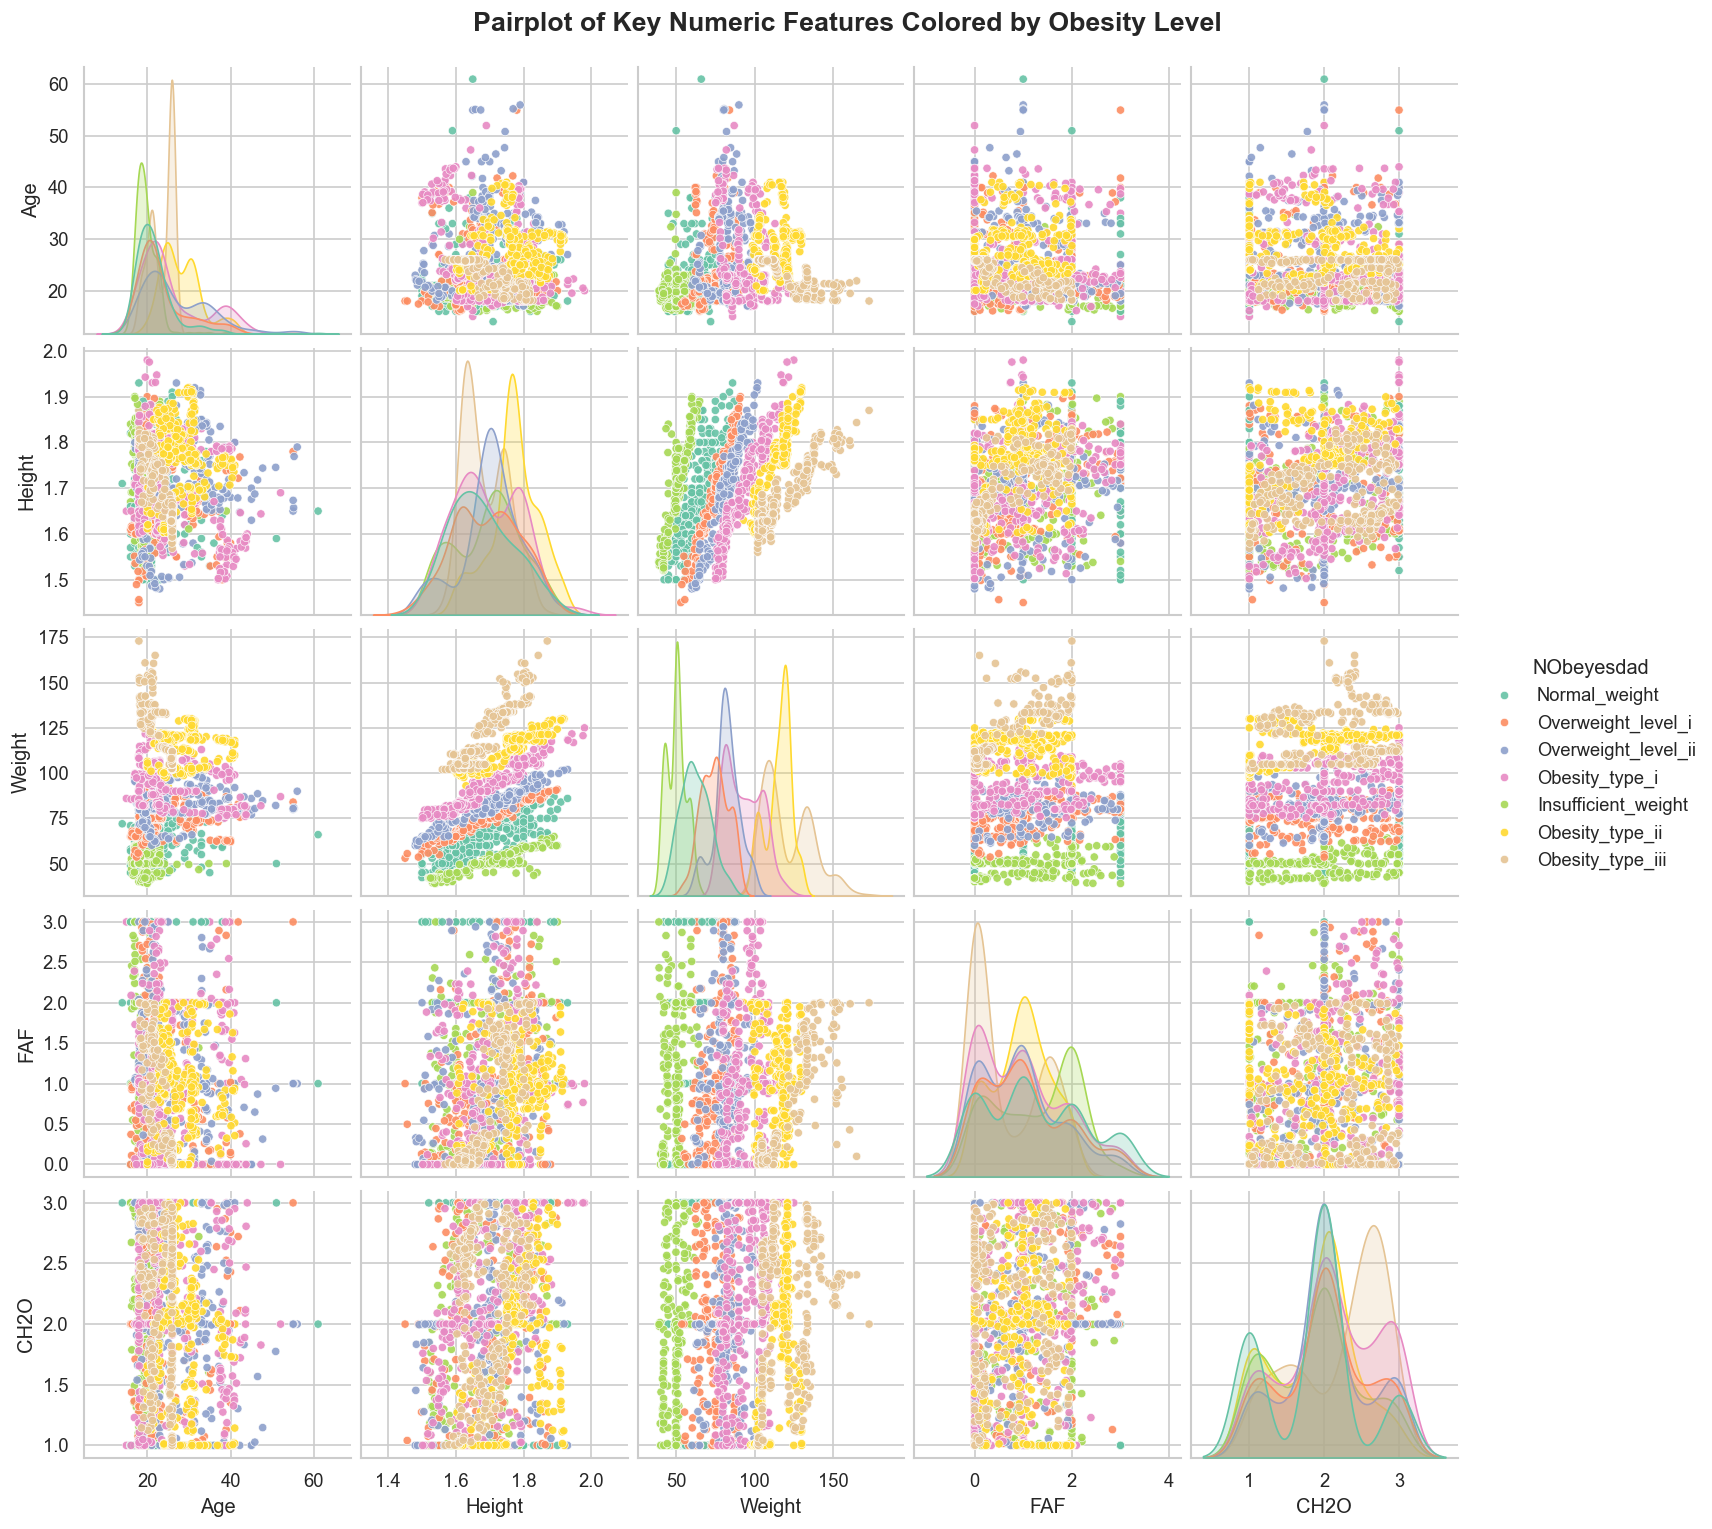

In [60]:
# Optimal features based on correlation (Height, Weight, Age) and synergy (FAF, CH2O)
selected_features = ['Age', 'Height', 'Weight', 'FAF', 'CH2O']

# Pairplot with KDE on diagonals, colored by obesity level
sns.pairplot(
    data=data_clean[selected_features + ['NObeyesdad']],  # Include target variable
    hue='NObeyesdad',
    palette='Set2', # Use a divergent palette for better distinction
    diag_kind='kde',
    plot_kws={'alpha': 0.9, 's': 25}  # Transparency and point size
)

plt.suptitle("Pairplot of Key Numeric Features Colored by Obesity Level", fontsize=16, fontweight='bold', y=1.02)
plt.savefig("../visuals/graph8_pairplot_optimal_obesity.png", bbox_inches='tight')
plt.show()

### Interpretation: Multivariate Clustering Graph:

- Height vs. Weight (Primary Separation):
  The scatterplot reveals the strongest and most consistent separation across obesity levels. Distinct diagonal bands form across groups, with high-risk categories (Obesity Types I, II, III) clustering tightly in the upper-mass region. This visual pattern reinforces why Weight is the dominant predictor: it cleanly partitions low-risk individuals (Normal, Insufficient Weight) from high-risk groups with minimal overlap.

- FAF (Physical Activity) vs. Weight (Actionable Separation):
  The Weight–FAF scatterplot highlights one of the clearest modifiable risk signals. High-risk clusters are heavily concentrated at low FAF values (0–1), while higher activity levels show much lighter density. This confirms that physical inactivity is a primary behavioral driver of obesity and that increasing FAF meaningfully shifts individuals away from the densest risk zones.

- Age vs. Weight (Minimal Separation):  
  The Weight–Age scatterplot shows broad overlap among obesity categories across the full age range. Normal-weight individuals and Obesity Type III appear throughout the same age bands, illustrating that Age provides weak standalone discriminatory power. This visual evidence supports deprioritizing age-targeted interventions in favor of more influential behavioral and demographic factors.


## 6.0 Conclusion & Recommendations
---
This analysis demonstrates that while demographic factors and baseline body mass establish an individual’s starting risk, the severity and real-world progression of obesity are overwhelmingly driven by modifiable lifestyle behaviors, most notably physical activity.  The multivariate and statistical results support a clear intervention hierarchy.


### 6.1 Top Predictors and Their Implications

| Rank | Feature | Predictive Power | Actionable Insight |
|------|---------|-----------------|------------------|
| 1    | Weight / BMI | Extremely high | Defines classification boundaries; used to measure intervention success. |
| 2    | FAF (Physical Activity) | Strong behavioral driver | Low activity (FAF 0–1) is the clearest marker of high-risk groups. |
| 3    | CH2O (Water Intake) | Low alone, high synergy | Works best as a paired behavior with FAF for habit-bundled campaigns. |
| 4    | Age | Weak | Risk is spread across all age groups; does not justify targeted interventions. |


### 6.2 Recommendations for Intervention Strategy

1.  Prioritize Physical Activity as the Primary Behavior: 
    - Focus on individuals with high weight and FAF scores of 0–1.  
    - Cluster analysis shows severe obesity concentrated almost entirely in this low-activity zone.  
    - Aim for incremental improvements (e.g., FAF 1 → 2) instead of high-bar exercise standards.  
    - Use low-barrier messaging like: "3 short sessions per week can shift you out of the danger zone."

2.  Use Behavioral Synergy: Pair CH2O and Physical Activity
    - FAF and CH2O are positively correlated, meaning habit pairing works.  
    - Bundle hydration with exercise campaigns:  "Hydration fuels your fitness. Move more → drink more → feel better."  
    - Leveraging this synergy increases the effectiveness of interventions for both habits.

3.  De-prioritize Demographic Targeting (Age, Height)
    - Age does not separate obesity groups; height is irrelevant for interventions.  
    - Avoid age-specific or demographic-segmented campaigns.  
    - Focus resources on behavior-only strategies, which have the highest impact across all groups.

### 6.3 Key Takeaways
- Weight/BMI is the dominant predictor and baseline for measuring intervention effectiveness.  
- Physical activity (FAF) is the most actionable modifiable behavior; increasing FAF moves individuals out of high-risk clusters.  
- Hydration (CH2O) amplifies behavior change when paired with physical activity.  
- Age and height should not guide targeting; interventions should focus on behaviors for maximum impact.


## 7.0  Next Steps and Future Work

The insights from this Exploratory Data Analysis (EDA) suggest the following advanced analytical directions:

 1. Feature Engineering & Clustering
    - Create composite behavioral indices (e.g., combining related consumption and activity metrics).  
    - Apply K-Means or Hierarchical Clustering on numeric features to investigate whether Gender and Obesity Level groupings (seen in categorical charts) emerge in the numeric space.

2. Predictive Modeling
   - Use the strongest risk factors identified in the EDA (FAVC, SCC, Family History, Gender) to train a classification model (e.g., Random Forest or XGBoost).  
   - Goal: Predict the `NObeyesdad` category based on these key predictors.

3. Model Interpretation & Validation
   - Assess feature importance from the predictive model.  
   - Validate EDA findings quantitatively to confirm whether FAVC and SCC are indeed the most important drivers for predicting obesity.  
   - Justify proposed interventions based on the model output.

4. Targeted Visualization
   - Conduct deeper analyses of non-linear relationships observed in categorical features (e.g., why 'Sometimes' for CAEC and CALC is high-risk).  
   - Refine intervention targeting based on these nuanced insights.
